# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy

In [7]:
#NO NEED TO RUN THIS, THIS IS A SCRIPT TO EXTRACT
nlp = spacy.load('en_core_web_sm')


df = pd.read_csv("static/Emotion_final.csv")

xList = []
yList = []

for _, row in df.iterrows():
    words = nlp(row['Text'])
    # words = row['Text'].split(" ")
    emotion = row['Emotion'] 
    for word in words:
        # xList.append(word)
        # yList.append(emotion)
        if word.pos_ in ['VERB', "ADJ", "ADV", "NOUN"]:
            xList.append(word.lemma_)      
            yList.append(emotion) 

wordsInDF = pd.DataFrame({'Word': xList, 'Emotion': yList})
# wordsInDF.to_csv("static/Extracted_Emotions_All_Included.csv", index = False)
wordsInDF.to_csv("static/Extracted_Emotions_VERB_ADJ_ADV.csv", index=False)
wordsInDF

,Word,Emotion
0,audacity,anger
1,person,anger
2,accuse,anger
3,lie,anger
4,only,anger
...,...,...
197023,face,fear
197024,dismayed,fear
197025,coup,fear
197026,dismay,fear


In [4]:
#LOAD DataFrame
wordsInDF = pd.read_csv("static/Extracted_Emotions_VERB_ADJ_ADV.csv")

wordsArray = wordsInDF['Word'].unique()
# wordsArray
emotionArray = ['sadness', 'anger', 'love', 'surprise', 'fear', 'happy']
# wordsInDF = pd.read_csv("static/Extracted_Emotions_All_Included.csv")

In [26]:
# wordsInDF[wordsInDF['Emotion'] == "sadness"].info()
# import openai
# from apikey import 
# 
# openai.api_key = APIKEY
# 
# output = 

<class 'pandas.core.frame.DataFrame'>
Index: 55548 entries, 533 to 191511
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Word     55548 non-null  object
 1   Emotion  55548 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


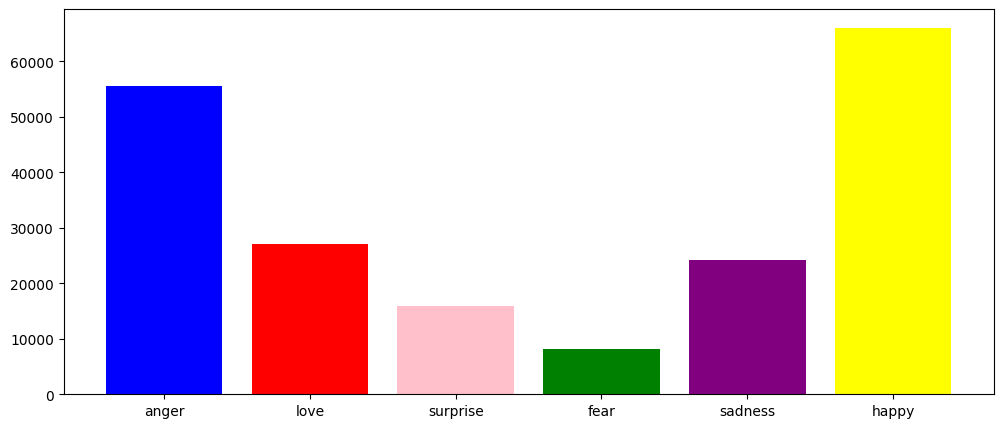

In [9]:
#SHOW BAR CHART OF EMOTIONS' COUNTS
plt.figure(figsize=(12,5))
color = ['blue', 'red', 'pink', 'green', 'purple', 'yellow']
countOfEmotions = [sum(wordsInDF[(wordsInDF["Emotion"]=='sadness')].groupby(wordsInDF["Emotion"]).value_counts()),sum(wordsInDF[(wordsInDF["Emotion"]=='anger')].groupby(wordsInDF["Emotion"]).value_counts()),sum(wordsInDF[(wordsInDF["Emotion"]=='love')].groupby(wordsInDF["Emotion"]).value_counts()),sum(wordsInDF[(wordsInDF["Emotion"]=='surprise')].groupby(wordsInDF["Emotion"]).value_counts()),sum(wordsInDF[(wordsInDF["Emotion"]=='fear')].groupby(wordsInDF["Emotion"]).value_counts()),sum(wordsInDF[(wordsInDF["Emotion"]=='happy')].groupby(wordsInDF["Emotion"]).value_counts())]
plt.bar(wordsInDF['Emotion'].unique(), countOfEmotions, align='center', color=color)
plt.show()

In [10]:
#NO NEED TO RUN THIS, THIS IS A SCRIPT TO ENCODE EACH WORD

wordsInDF["Emotion"].unique()
wordsArray = wordsInDF['Word'].unique()
# wordsArray
emotionArray = ['sadness', 'anger', 'love', 'surprise', 'fear', 'happy']

wordsInDF['Emotion'] = wordsInDF['Emotion'].apply(lambda emotion: emotionArray.index(emotion))
# wordsInDF
wordsInDF['Word'] = wordsInDF['Word'].apply(lambda word: list(wordsArray).index(word))
# wordsInDF.to_csv("static/Emotion_Encoded.csv")
wordsInDF.to_csv("static/Encoded_VERB_ADJ_ADV.csv")

In [6]:
# LOADING FROM Emotion_Encoded
wordsInDF = pd.read_csv("static/Encoded_VERB_ADJ_ADV.csv")
# wordsInDF = pd.read_csv("static/Emotion_Encoded.csv")

wordsInDF = wordsInDF.drop('Unnamed: 0', axis=1)
# wordsInDF.corr()
wordsInDF

,Word,Emotion
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
197023,55,4
197024,1502,4
197025,13417,4
197026,6076,4


In [7]:
# USING DECISION TREE TO MAKE PREDICTION
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# model = LinearRegression()
model = DecisionTreeClassifier()
#TRAIN
model.fit(wordsInDF.drop("Emotion", axis = 1), wordsInDF.drop("Word", axis = 1))



DecisionTreeClassifier()

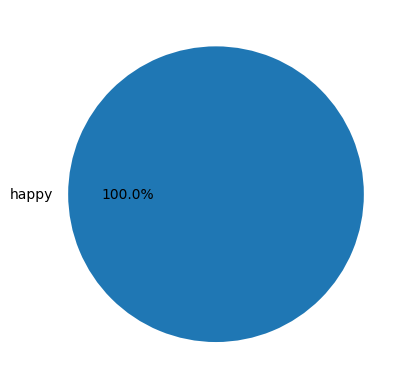

In [16]:
# PREDICT FROM USER INPUT
import spacy

test = input("Enter a text to predict the emotions.")
print()
testIndices = []
test = test.lower()

nlp = spacy.load('en_core_web_sm')
test = nlp(test)


for word in test:
    if word.text in list(wordsArray) and word.pos_ in ['VERB', "ADJ", "ADV"]:
        testIndices.append(list(wordsArray).index(word.lemma_))
testDF = pd.DataFrame({'Word': testIndices})

emotionScalar = [0] * len(emotionArray)

# predictions = np.array(model.predict(testDF))
# TRYING FOR LINEAR REGRESSIONS
# rounded_predictions = np.round(predictions).astype(int)

for i in model.predict(testDF):
    emotionScalar[i] += 1

finalEmotionPieScalar = []
finalEmotionPie = []
for i in emotionScalar:
    if i > 0 and emotionArray[emotionScalar.index(i)] not in finalEmotionPie:
        finalEmotionPie.append(emotionArray[emotionScalar.index(i)])
        finalEmotionPieScalar.append(i)
plt.pie(finalEmotionPieScalar, labels=finalEmotionPie, autopct='%1.1f%%')
plt.show()
